# Training a CNN to do hurricane damage detection
all credit for starter code goes to this repo (https://github.com/qcao10/DamageDetection
)

In [1]:
import tensorflow.keras as keras
import h5py
import PIL.Image
import os, shutil
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.regularizers import l2

In [2]:
original_dataset_dir = ''
train_damage_dir = original_dataset_dir + 'damage'
validation_damage_dir = original_dataset_dir + 'validation_another/damage'
test_damage_dir = original_dataset_dir + 'test/damage'

train_nodamage_dir = original_dataset_dir + 'no_damage'
validation_nodamage_dir = original_dataset_dir + 'validation_another/no_damage'
test_nodamage_dir = original_dataset_dir + 'test/no_damage'

In [3]:
print('total training damage images: ',len(os.listdir(train_damage_dir)))
print('total validation damage images: ',len(os.listdir(validation_damage_dir)))
print('total test damage images: ',len(os.listdir(test_damage_dir)))

print('total training no damage images: ',len(os.listdir(train_nodamage_dir)))
print('total validation no damage images: ',len(os.listdir(validation_nodamage_dir)))
print('total test no damage images: ',len(os.listdir(test_nodamage_dir)))

total training damage images:  14284
total validation damage images:  1000
total test damage images:  1000
total training no damage images:  7208
total validation no damage images:  1000
total test no damage images:  1000


In [4]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
#compile the model with RMSprob with learning rate
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(), metrics = ['acc'])
# change LR to 0.0001

In [6]:
#process the jpeg image
#create an image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#normalize the image pixel value to be between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    'train_another', 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    'validation_another',
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
#fit the model from image generator
history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=10,
            validation_data=validation_generator,
            # validation_steps=
            )

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 192ms/step - acc: 0.5108 - loss: 0.9958 - val_acc: 0.6060 - val_loss: 0.6895
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 177ms/step - acc: 0.5979 - loss: 0.6772 - val_acc: 0.7950 - val_loss: 0.4595
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - acc: 0.8094 - loss: 0.4485 - val_acc: 0.8270 - val_loss: 0.4198
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - acc: 0.8417 - loss: 0.3484 - val_acc: 0.8855 - val_loss: 0.2706
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - acc: 0.8740 - loss: 0.3016 - val_acc: 0.9010 - val_loss: 0.2401
Epoch 6/10


2024-10-29 14:30:50.258534: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.9010 - val_loss: 0.2401
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - acc: 0.8793 - loss: 0.2788 - val_acc: 0.8670 - val_loss: 0.3289
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 161ms/step - acc: 0.8880 - loss: 0.2897 - val_acc: 0.9235 - val_loss: 0.1971
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - acc: 0.9040 - loss: 0.2356 - val_acc: 0.9195 - val_loss: 0.2013
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - acc: 0.8876 - loss: 0.2426 - val_acc: 0.9190 - val_loss: 0.1921


In [8]:
len(history.history['acc'])

10

In [10]:
# save the model we trained
model.save('models/CNN_10epochs.keras')

### How did it do? 
Really well it seems! Accuracy of *97.47%*
lets plot the improvements and then check test data predictions to see if we're overfitting

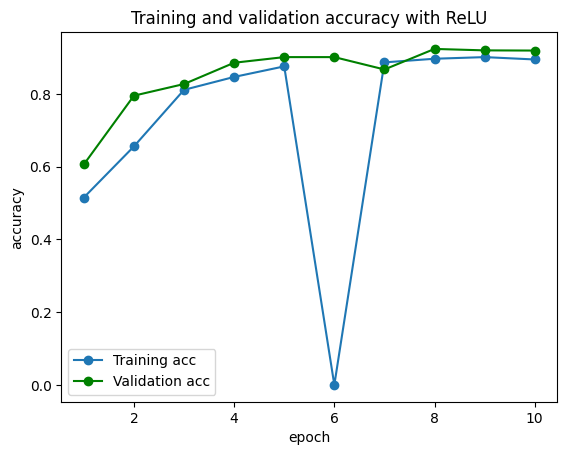

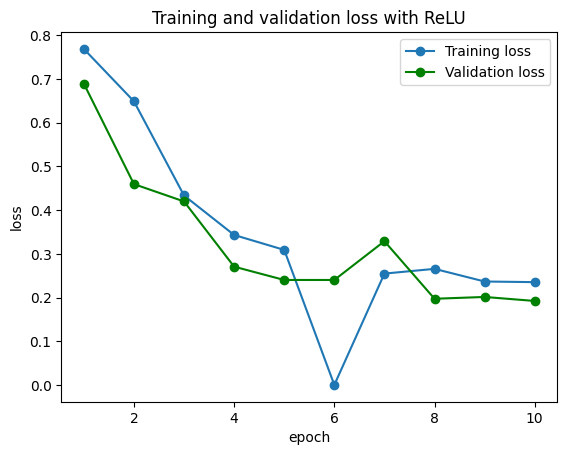

In [11]:
#plot loss and accuracy for detection overfitting (30 epochs)
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'o-', label = 'Training acc')
plt.plot(epochs, val_acc, 'go-', label = 'Validation acc')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title('Training and validation accuracy with ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'o-', label = 'Training loss')
plt.plot(epochs, val_loss, 'go-', label = 'Validation loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title('Training and validation loss with ReLU')
plt.legend()

plt.show()